<font color='blue'> please import packages below before starting </font>

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# PCA(Unsupervised Learning)

For this section, we are going to bring our data from a website. <br>
First, we paste the url and define it as a variable. <br>
Then, using __pandas__, let's call our data with specific column names.

In [2]:
# Load Iris Dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

# Dataset into pandas DataFrame
df = pd.read_csv(url, names=['sepal length', 'sepal width', 'petal length', 'petal width', 'target'])

We want to classify the flowers into categories with the data of sepal and petal. <br>
So, we need a preprocessing of the data. <br>
Function __loc__ enables us to access columns by their names. <br>
<font color='blue'>df.loc[행 인덱싱 값, 열 인덱싱 값]</font>

In [3]:
# Separating out the features and target
features = ['sepal length', 'sepal width', 'petal length', 'petal width']
X = df.loc[:, features].values
y = df.loc[:, 'target'].values

# Check the dataset
print(X.shape , y.shape)

(150, 4) (150,)


Because PCA is affected by the different data scales, we need to standardize the data. <br>
We have a useful tool that quickly converts the data into standardized manner.<br>
<font color='blue'>class sklearn.preprocessing.StandardScaler(copy=True, with_mean=True, with_std=True).fit_transform(X)</font>

In [5]:
# Standardize the features
X = StandardScaler().fit_transform(X)
print(X[0:5, :])

[[-0.90068117  1.03205722 -1.3412724  -1.31297673]
 [-1.14301691 -0.1249576  -1.3412724  -1.31297673]
 [-1.38535265  0.33784833 -1.39813811 -1.31297673]
 [-1.50652052  0.10644536 -1.2844067  -1.31297673]
 [-1.02184904  1.26346019 -1.3412724  -1.31297673]]


### PCA Projection to 2D
#### The Original data has 4 columns. PCA  projects the original data which is 4 dimensional into 2 dimensions.

As before, we also have a class variable for PCA. <br>
Let's define it and with the function __fit_transform__, make a projection to lower space.<br>
<font color='blue'>class sklearn.decomposition.PCA(n_components=None)</font>

In [6]:
# Make an instance of the PCA
pca = PCA(n_components=2)

# Fit the PCA algorithm
principalComponents = pca.fit_transform(X) # array of principal component 1 & 2
principalComponents.shape # Check PCA applied or Not

(150, 2)

Take a look at what we've got: <br>
<font color='blue'> class pandas.DataFrame(data, columns) </font>

In [7]:
# Table of principal components
principalDF = pd.DataFrame(principalComponents, columns=['principal component 1', 'principal component 2'])
principalDF.head() # Check head-5 data

,principal component 1,principal component 2
0,-2.264542,0.505704
1,-2.086426,-0.655405
2,-2.367950,-0.318477
3,-2.304197,-0.575368
4,-2.388777,0.674767


Let's put the label back together:

In [8]:
# Concatenating DataFrame of principal components and targets
finalDF = pd.concat([principalDF, df[['target']]], axis = 1)
finalDF.head() # check head-5 data

,principal component 1,principal component 2,target
0,-2.264542,0.505704,Iris-setosa
1,-2.086426,-0.655405,Iris-setosa
2,-2.367950,-0.318477,Iris-setosa
3,-2.304197,-0.575368,Iris-setosa
4,-2.388777,0.674767,Iris-setosa


### Visualize 2D Projection

Since we projected the data into 2-dimensional space, we can visualize the projection in 2D space. <br>
__plt__ will help us get through. First, make a list of labels and corresponding color(you can choose it whatever you want) <br>
then for each iteration, try access to the data of the specific label and plot it in the figure with color.

Text(0, 0.5, 'Principal Component 2')

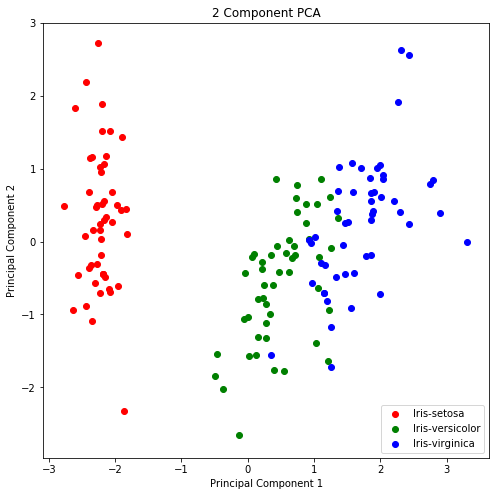

In [9]:
plt.figure(figsize = (8, 8))
plt.title("2 Component PCA")

targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets, colors):
    idx = finalDF['target'] == target
    plt.scatter(finalDF.loc[idx, 'principal component 1'], finalDF.loc[idx, 'principal component 2'], c=color)
    
plt.legend(targets)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")


How easy to analyze!
Now it's your turn to make the projection.

# [Practice 3] : the cancer dataset (PCA) 0: 양성, 1: 악성
### P3.1. You should fill in the blank between # and # with code

In [10]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_breast_cancer

In [11]:
# Load the dataset (Digits Dataset)
breast = load_breast_cancer()

In [12]:
X, y = breast.data, breast.target

# Check the dataset
#######################################
print(X.shape, y.shape)
#######################################

(569, 30) (569,)


In [13]:
# Concatenate between data and target
label = np.reshape(y, (569, 1))
full_breast = np.concatenate([X, label], axis=1)
full_breast.shape

(569, 31)

In [14]:
# Make the dataframe
df = pd.DataFrame(full_breast)
df.rename(columns = {30 : 'target'}, inplace = True)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


## PCA Projection to 2D
### P3.1. You should write down the answer of the number of features in (?)
#### The Original data has ( 30 ) columns(features). PCA  projects the original data which is ( 30 ) dimensional into <font color=red>2 dimensions.</font>

In [16]:
# Make an instance of the PCA
###########################################
pca = PCA(n_components=2)
###########################################


# Fit the PCA algorithm
###########################################
X = StandardScaler().fit_transform(X)
principalComponents = pca.fit_transform(X)
###########################################

In [17]:
# Table of principal components
###########################################
principalDF = pd.DataFrame(data=principalComponents, columns=['principal component 1', 'principal component 2'])
principalDF.head()
###########################################

,principal component 1,principal component 2
0,9.192837,1.948583
1,2.387802,-3.768172
2,5.733896,-1.075174
3,7.122953,10.275589
4,3.935302,-1.948072


In [18]:
# Concatenating DataFrame of principal components and targets
#############################################################
finalDF = pd.concat([principalDF, df[['target']]], axis = 1)
finalDF.head()
#############################################################

,principal component 1,principal component 2,target
0,9.192837,1.948583,0.0
1,2.387802,-3.768172,0.0
2,5.733896,-1.075174,0.0
3,7.122953,10.275589,0.0
4,3.935302,-1.948072,0.0


## Visualize 2D Projection

Text(0, 0.5, 'Principal Component 2')

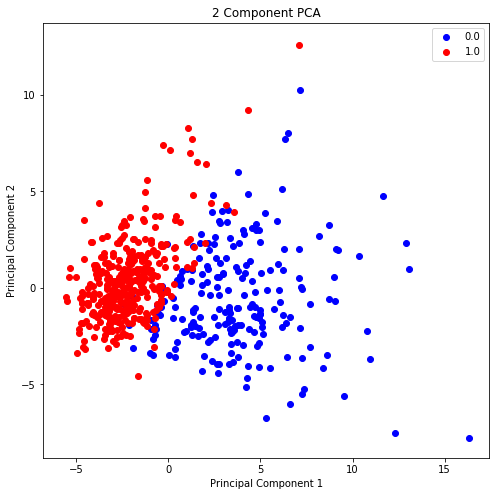

In [19]:
plt.figure(figsize = (8, 8))
plt.title("2 Component PCA")

targets = [0.0, 1.0]
colors = ['b', 'r']
for target, color in zip(targets, colors):
    idx = finalDF['target'] == target
    plt.scatter(finalDF.loc[idx, 'principal component 1'], finalDF.loc[idx, 'principal component 2'], c=color)

plt.legend(targets)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")

### P3.3. With the data projected from high dimension to 2 dimension, can we directly classify the projected data into 0(positive) and 1(negative)? (Yes, or No) : ( Yes )
### P3.4. If the answer is yes, what would be the appropriate machine learning algorithm? If your answer is no, please explain the reason : ( Classification models like Support vector machine, k-Nearest neighbors, ... )